In [1]:
import pandas as pd
data=pd.read_excel("BD_creditos.xlsx")

In [2]:
import numpy as np
import scipy.stats as stats
import math, seaborn as sns, matplotlib.pyplot as plt

# **Exploración incial de los datos**

## Descripción general de los datos

**Característización de los datos: numéricos (discretos, continuos), categóricos (ordinles, nominales, politómicos, dicotómicos)**

**Categóricas**

**Ordinales**
* tendencia_ingresos: ingresos del cliente

**Nominales**

* tipo_labooral: condición laboral del cliente

**Politómicas**

* tipo_credito: Identificador del tipo de crédito (está codificada)

**Numéricas**

**Discreta**

* plazo_meses: duración del préstamo
* edad_cliente: Edad del cliente
* puntaje_datacredito: puntaje del cliente en datacredito (riesgo)
* cant_creditosvigentes: número de créditos vigentes
* huella_consulta: numero de veces que el historial crediticio del cliente ha sido consultado
* créditos_sector(cooperativo, financiero,real): número de créditos en el sector

**Continua**

* capital_prestado: monto total del préstamo
* salario_cliente: ingresos mensuales del cliente
* total_otros_prestamos: valor total de otros préstamos del cliente
* cuota_pactada: monto de la cuota mensual acordada
* puntaje: riesgo calculado
* saldo_mora: cuotas atrasadas
* saldo_total:saldo total de la deuda del préstamo
* saldo_principal: saldo
* saldo_mora_codeudor: valor en mora asociado al codeudor
* promedio_ingresos_datacredito: promedio de ingresos del reportado por datacredito


## Revisión de nulos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

**Columnas con nulos:**

puntaje_datacredito: 6 nulos
saldo_mora: 156 nulos
saldo_total: 156 nulos
saldo_principal: 405 nulos
saldo_mora_codeudor: 590 nulos
promedio_ingresos_datacredito: 2930 nulos
tendencia_ingresos: 2932 nulos

In [4]:
print("Puntaje mínimo:", data["puntaje"].min())
print("Puntaje máximo :", data["puntaje"].max())
print("Puntaje Data credito mínimo:", data["puntaje_datacredito"].min())
print("Puntaje Data credito máximo:", data["puntaje_datacredito"].max())

Puntaje mínimo: -38.00999
Puntaje máximo : 95.227787
Puntaje Data credito mínimo: -7.0
Puntaje Data credito máximo: 999.0


Por conocimiento de las reglas del negocio, el puntaje tiene que estar dentro del rango 0-100 y en datacredito 150-950, y por lo que se puede evidenciar, existen valores por fuera de este rango. A pesar de que no aparecen como nulos, deben de tratarse como tal, porque generan inconsistencias en las etapas posteriores del proyecto

## Unificar la forma como se representan los valores nulos

In [5]:
df=data.copy()

In [6]:
# Revisar los valores únicos en columnas con nulos
for col in df.columns[df.isnull().any()]:
    print(f"Columna: {col}")
    print(df[col].unique(), "\n")

Columna: puntaje_datacredito
[795. 796. 727. 864. 771. 678. 665. 738. 769. 785. 747. 688. 814. 666.
 758. 792. 756. 831. 679. 978. 801. 797. 588. 777. 718. 744. 845. 947.
 768. 844. 811. 760. 779. 798. 789. 767. 895. 925. 781. 734. 729. 790.
 749. 791. 743. 692. 775. 761. 685. 751.  nan 805. 754. 764. 723. 684.
 757. 770. 746. 710. 806. 823. 670. 817. 694. 794. 681. 691. 802. 812.
 776. 714. 664. 707. 783. 930. 841. 697. 787. 799. 860. 780. 784. 766.
 793. 887. 810. 682. 772. 732. 856. 667. 847. 788. 912. 866. 712. 748.
 762. 706. 765. 848. 708. 800. 880. 774. 827. 803. 846. 815. 865. 830.
 826. 885. 835. 843. 829. 786. 850. 782. 836. 809. 819. 828. 853. 821.
 816. 849. 854. 731. 740. 724. 867. 872. 873. 741. 863. 825. 910. 883.
 778. 717. 890. 804. 879. 857. 874. 818. 891. 884. 862. 726. 742. 859.
 763. 852. 840. 750. 851. 888. 739. 834. 824. 813. 759. 753. 838. 858.
 869. 893. 711. 735. 882. 837. 730. 876. 807. 871. 680. 870. 839. 903.
 896. 833. 704. 719. 715. 881. 709. 745. 722. 75

"Tendencia_ingresos" tiene registros numéricos aparte de los valores: estable, creciente, decreciente. Hay que unificar todos estos registros y convertirlos a NaN

In [7]:
valores = ["Estable", "Creciente", "Decreciente"]

df["tendencia_ingresos"] = df["tendencia_ingresos"].where(
    df["tendencia_ingresos"].isin(valores)
)

In [8]:
df["tendencia_ingresos"].value_counts(dropna=False)

tendencia_ingresos
Creciente      5294
NaN            2990
Decreciente    1291
Estable        1188
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

## Eliminación de variables irrelevantes o redundantes

### Exploración de variables redundantes

#### Saldo_total=saldo_mora + saldo_principal+saldo mora codeudor?

In [10]:
df1=df.copy()

df1["check_saldo"] = df1["saldo_principal"].fillna(0) + df1["saldo_mora"].fillna(0) + df1["saldo_mora_codeudor"].fillna(0)

# Revisamos coincidencia
coincidencias = (df1["check_saldo"] == df1["saldo_total"]).sum()
total_filas = len(df1)

print(f"Coincidencias exactas: {coincidencias}/{total_filas}")
print(f"Porcentaje: {coincidencias/total_filas:.2%}")

# Revisar casos donde no coinciden
df1.loc[df1["check_saldo"] != df1["saldo_total"], ["saldo_total","saldo_principal","saldo_mora"]].head()


Coincidencias exactas: 8858/10763
Porcentaje: 82.30%


,saldo_total,saldo_principal,saldo_mora
10,1112.0,1112.0,172.0
56,NaN,NaN,NaN
81,443.0,443.0,30.0
130,14163.0,13292.0,0.0
145,53205.0,22799.0,0.0


El 82% de los registros cumple con la relación saldo_total=saldo_principal + saldo_mora, mientras que en el 18% restante existen diferencias. Esto sugiere que no son variables redundantes entre sí, sino que saldo total puede incluir otros componentes como intereses o cargos adicionales.

#### cant_creditosvigentes = sum (creditos x sector)???

In [11]:
# Columna auxiliar con la suma por sector (tratando NaN como 0)
df1["suma_creditos"] = (df1["creditos_sectorFinanciero"].fillna(0) + df1["creditos_sectorCooperativo"].fillna(0) +
                       df1["creditos_sectorReal"].fillna(0))

# Coincidencia exacta
coincidencias = (df1["suma_creditos"] == df1["cant_creditosvigentes"]).sum()
total_filas = len(df1)

print(f"Coincidencias exactas: {coincidencias}/{total_filas}")
print(f"Porcentaje: {coincidencias/total_filas:.2%}")

Coincidencias exactas: 3117/10763
Porcentaje: 28.96%


Solo el 28% de los registros coinciden en la cantidad de créditos vigentes con la sumatoria de los créditos por sector. Quizás existen otros sectores de créditos no representado en las columnas actuales. O es una diferencia en la definición de los créditos vigentes respecto a la suma de los sectores

### Eliminación de variables irrelevates

Por conocimiento de las reglas del negocio la fecha_prestamo puede eliminarse porque no corresponde a un valor del pasadado, es decir de cuando el cliente tomó por primera vez el crédito. Sino más bien a un valor futuro en el cual está proyetado que el cliente termine de pagar

In [12]:
df.drop(columns=["fecha_prestamo"], inplace=True)

## Convertir el tipo de datos y corrección del tipo de datos

In [13]:
# Categóricas
df["tipo_credito"] = df["tipo_credito"].astype("category")
df["tipo_laboral"] = df["tipo_laboral"].astype("category")
df["tendencia_ingresos"] = df["tendencia_ingresos"].astype("category")
df["Pago_atiempo"] = df["Pago_atiempo"].astype("category")


# **Exploración de datos y descripción**

## Análisis univariable

### Variables numéricas

In [14]:
df.describe()

,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito
count,1.076300e+04,10763.000000,10763.000000,1.076300e+04,1.076300e+04,1.076300e+04,10763.000000,10757.000000,10763.000000,10763.000000,10607.000000,1.060700e+04,1.035800e+04,10173.000000,10763.000000,10763.000000,10763.000000,7.833000e+03
mean,2.434315e+06,10.575583,43.948620,1.721643e+07,6.238870e+06,2.436174e+05,91.170036,780.790834,5.726749,4.228561,7.746017,4.593741e+04,4.034617e+04,0.260002,2.779987,0.269813,1.302704,2.005157e+06
std,1.909643e+06,6.632082,15.060877,3.554767e+08,1.184183e+08,2.104937e+05,16.465441,104.878031,3.977162,3.064683,225.955117,1.062698e+05,7.124244e+04,21.772917,2.748807,0.716471,1.824430,2.144116e+06
min,3.600000e+05,2.000000,19.000000,0.000000e+00,0.000000e+00,2.394400e+04,-38.009990,-7.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.224831e+06,6.000000,33.000000,2.000000e+06,5.000000e+05,1.210415e+05,95.227787,757.000000,3.000000,2.000000,0.000000,2.898000e+03,2.690000e+03,0.000000,1.000000,0.000000,0.000000,9.251570e+05
50%,1.921920e+06,10.000000,42.000000,3.000000e+06,1.000000e+06,1.828630e+05,95.227787,791.000000,5.000000,4.000000,0.000000,1.617800e+04,1.444250e+04,0.000000,2.000000,0.000000,1.000000,1.204496e+06
75%,3.084840e+06,12.000000,53.000000,4.875808e+06,2.000000e+06,2.878335e+05,95.227787,825.000000,8.000000,6.000000,0.000000,5.298200e+04,4.763225e+04,0.000000,4.000000,0.000000,2.000000,2.231859e+06
max,4.144415e+07,90.000000,123.000000,2.200000e+10,6.787675e+09,3.816752e+06,95.227787,999.000000,62.000000,29.000000,12534.000000,5.116066e+06,1.562285e+06,2145.000000,51.000000,13.000000,25.000000,3.810658e+07


Graficar histogramas para las variables numéricas

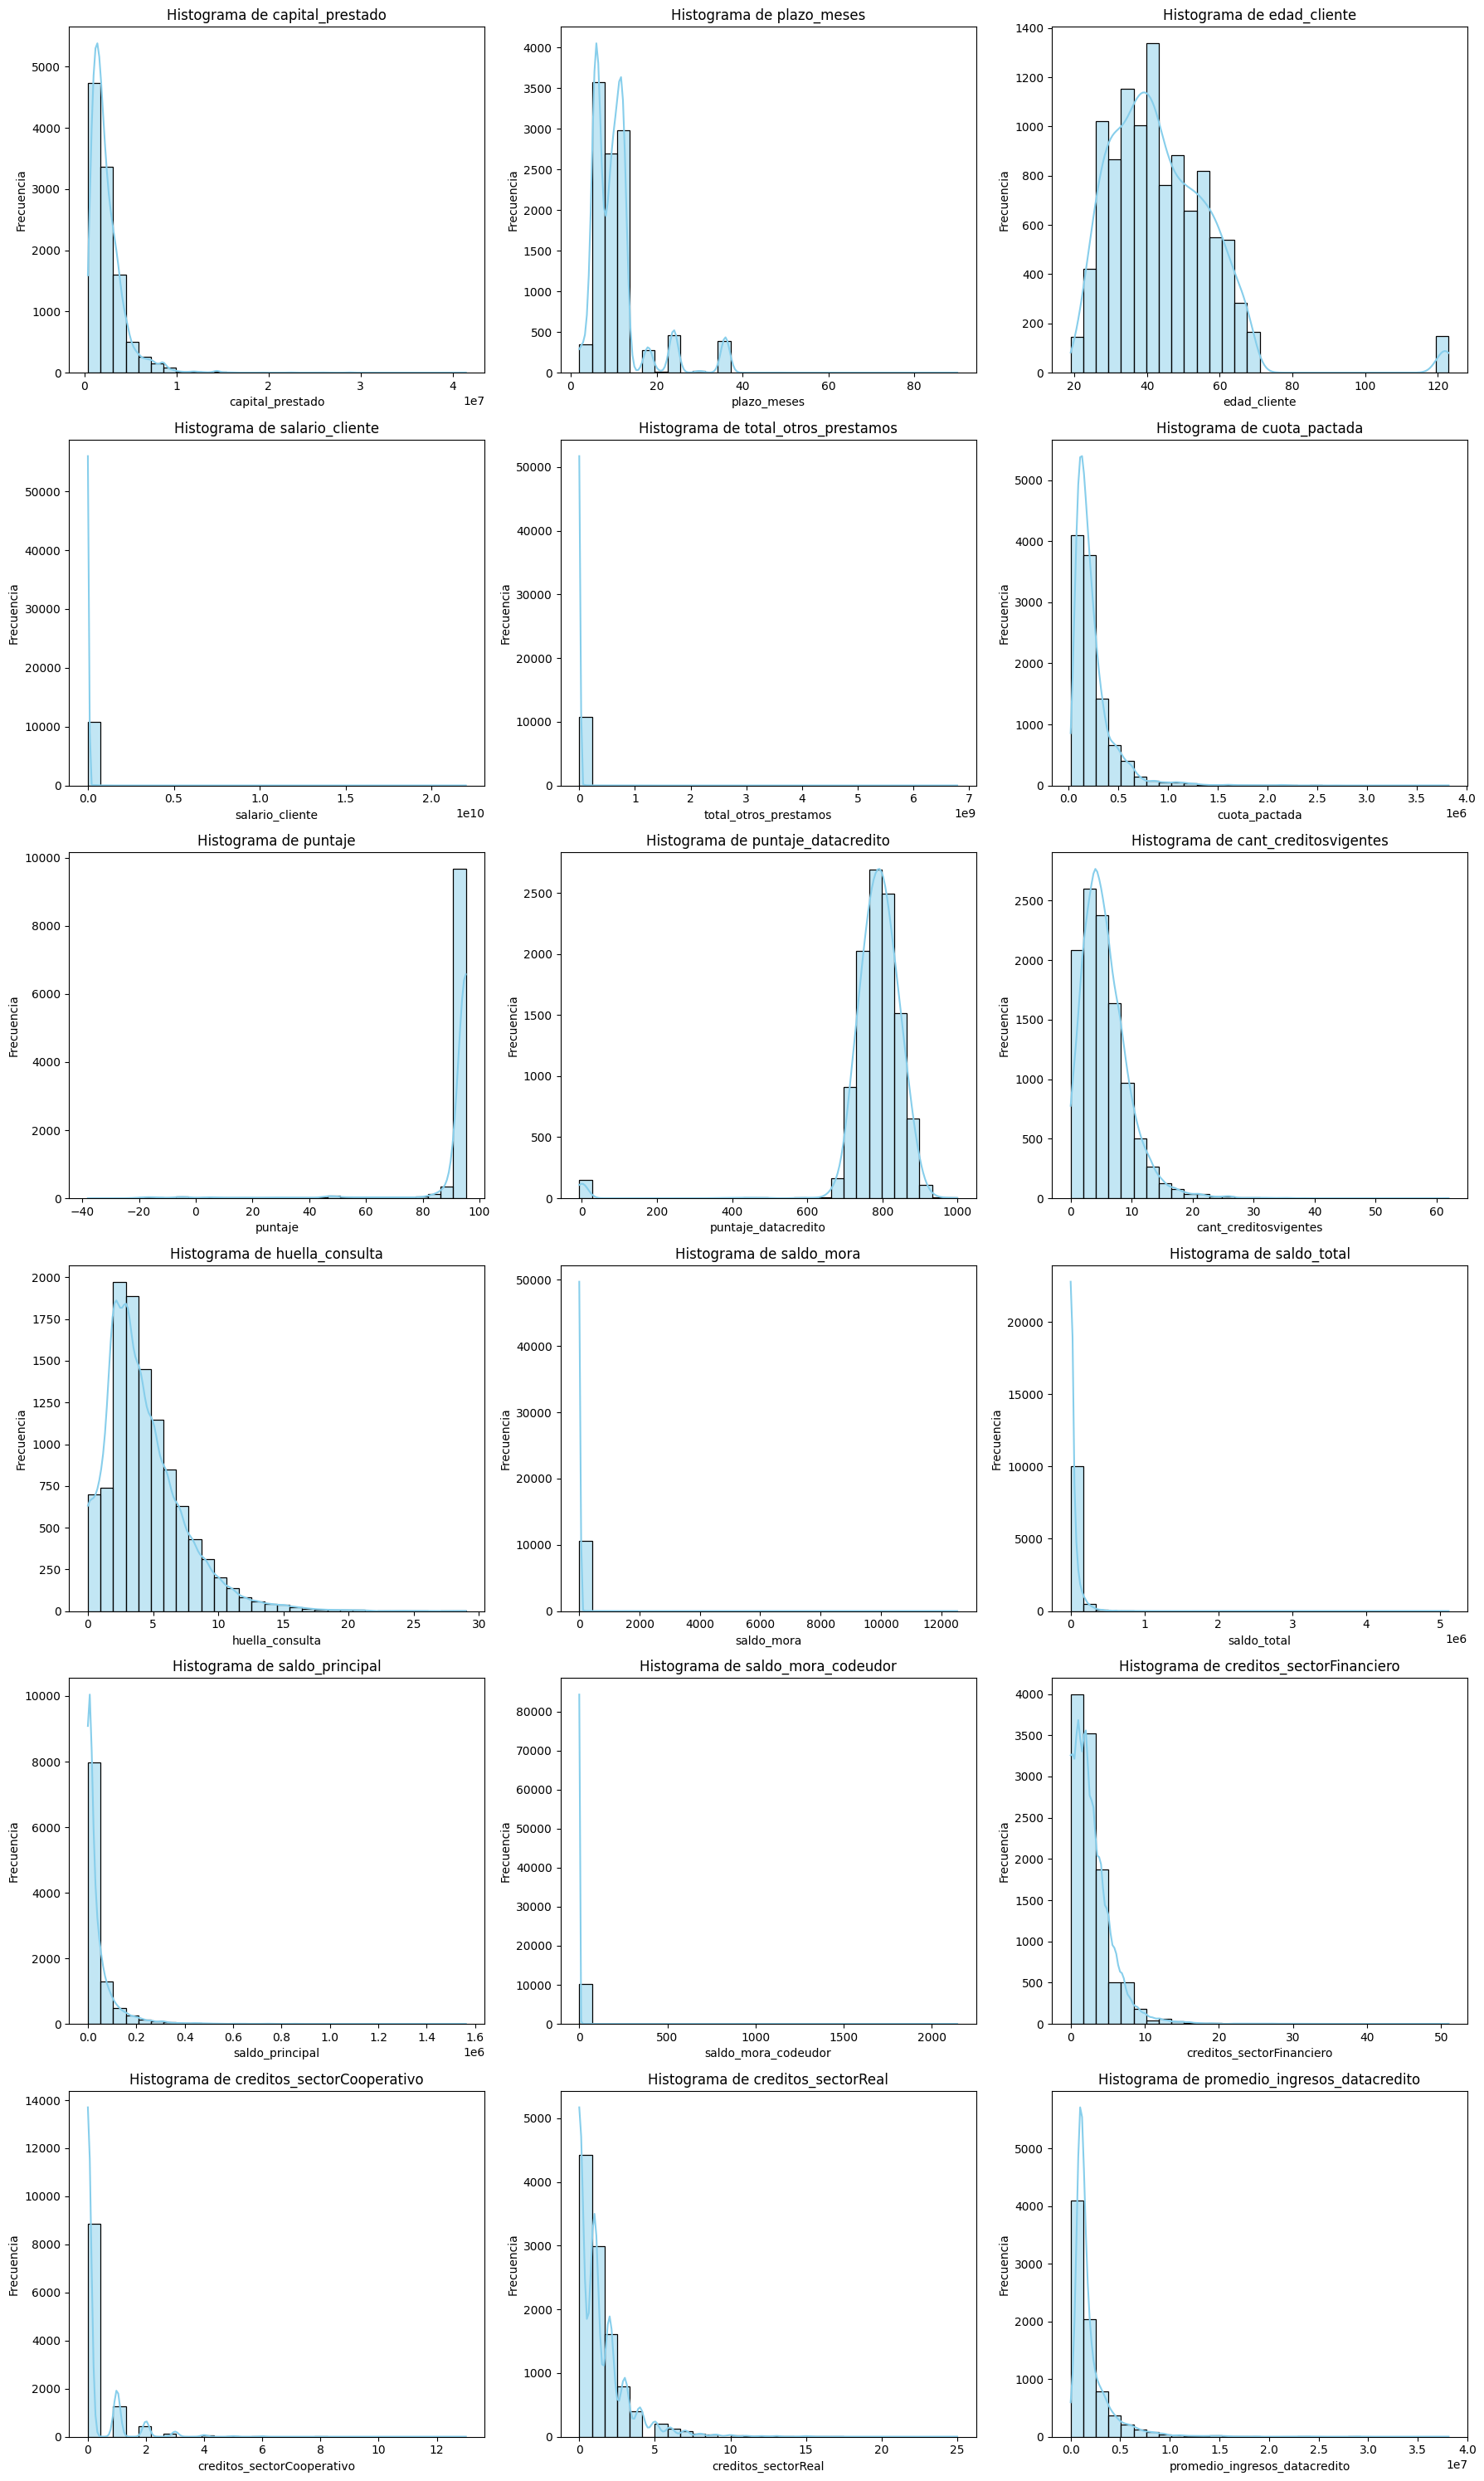

In [15]:
numericas = df.select_dtypes(include=["int64", "float64"]).columns

n_cols = 3
n_rows = (len(numericas) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numericas):
    sns.histplot(df[col], kde=True, bins=30, color="skyblue", ax=axes[i])
    axes[i].set_title(f"Histograma de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")

# Eliminar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

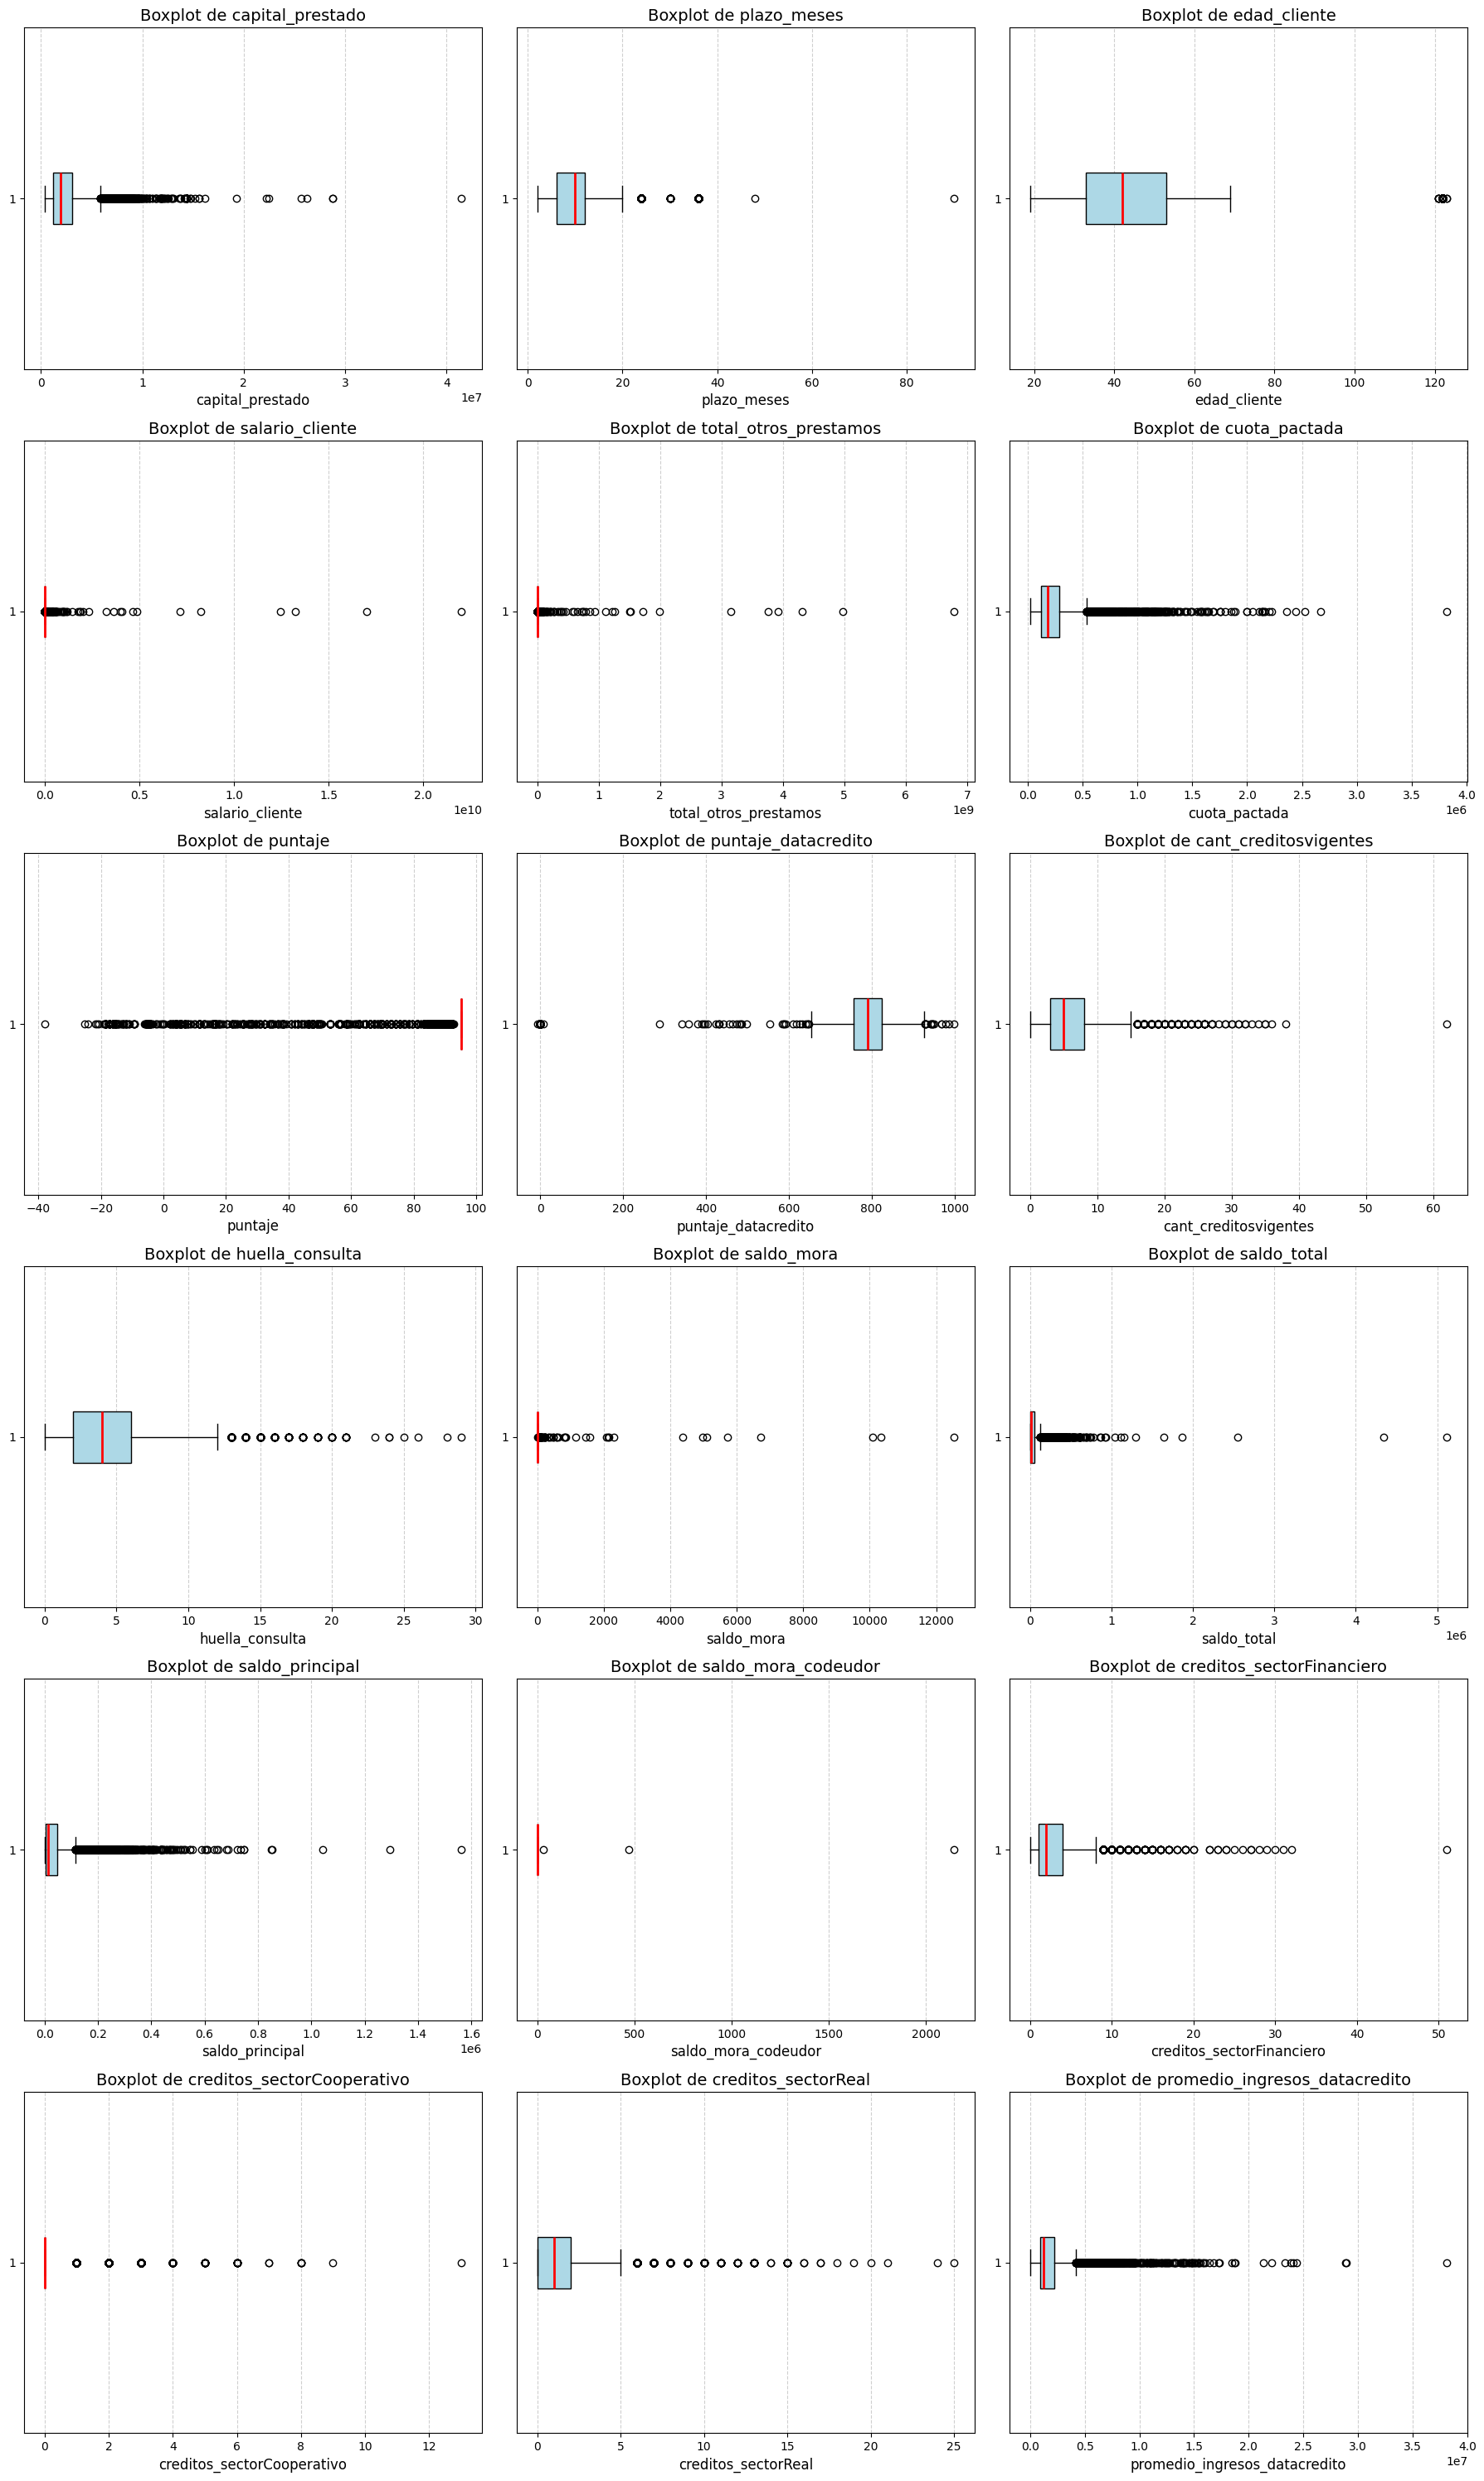

In [16]:
n_cols = 3
n_rows = (len(numericas) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numericas):
    axes[i].boxplot(
        df[col].dropna(),
        vert=False,
        patch_artist=True,
        boxprops=dict(facecolor="lightblue", color="black"),
        medianprops=dict(color="red", linewidth=2)
    )
    axes[i].set_title(f"Boxplot de {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].grid(axis="x", linestyle="--", alpha=0.6)

# Eliminar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [17]:
def medidas_adicionales(df, columnas, redondear=3):

    resultados = {}

    for col in columnas:
        serie = df[col].dropna()
        resultados[col] = {
            "Moda": serie.mode()[0] if not serie.mode().empty else None,
            "Varianza": serie.var(),
            "Desviación estándar": serie.std(),
            "Asimetría (skewness)": stats.skew(serie) if len(serie) > 2 else None,
            "Curtosis": stats.kurtosis(serie) if len(serie) > 3 else None
        }

    tabla = pd.DataFrame(resultados).round(redondear)

    return tabla

In [18]:
otras_medidas = medidas_adicionales(df, columnas=numericas)
otras_medidas

,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito
Moda,1.200000e+06,6.000,40.000,3.000000e+06,2.000000e+06,2.059900e+05,95.228,0.000,4.000,2.000,0.000,0.000000e+00,0.000000e+00,0.000,1.000,0.000,0.000,9.085260e+05
Varianza,3.646735e+12,43.985,226.830,1.263637e+17,1.402290e+16,4.430760e+10,271.111,10999.401,15.818,9.392,51055.715,1.129327e+10,5.075485e+09,474.060,7.556,0.513,3.329,4.597234e+12
Desviación estándar,1.909643e+06,6.632,15.061,3.554767e+08,1.184183e+08,2.104937e+05,16.465,104.878,3.977,3.065,225.955,1.062698e+05,7.124244e+04,21.773,2.749,0.716,1.824,2.144116e+06
Asimetría (skewness),3.723000e+00,2.459,1.934,4.377100e+01,3.845900e+01,3.793000e+00,-4.865,-5.644,1.797,1.487,40.563,2.019500e+01,5.049000e+00,94.957,2.703,4.218,3.164,4.279000e+00
Curtosis,3.530100e+01,7.776,7.865,2.210202e+03,1.718482e+03,2.663800e+01,24.069,39.419,8.619,3.997,1844.842,7.887940e+02,5.103900e+01,9275.264,19.432,29.337,18.178,3.274900e+01


#### Insights

* **Capital prestado:** tiene un sesgo positivo, lo que quiere decir que la mayoría de los valores se concentran en montos bajos, mientras que existe una cola larga hacia la derecha correspondiente a préstamos de gran valor pero poco frecuentes, que se reflejan como outliers en el boxplot.

* **Plazo meses**: muestra una marcada concentración en préstamos de corto plazo (entre 1 y 12 meses), lo que indica que la entidad se enfoca principalmente en créditos de rápida rotación. No obstante, también se observan grupos bien definidos en plazos intermedios y largos (24, 36, 48 e incluso hasta 84 meses), que corresponden a nichos de clientes con necesidades de financiamiento más prolongadas. Este patrón de dispersión, confirmado por la presencia de valores atípicos en el boxplot, no corresponde a errores de captura sino a modalidades específicas de crédito.

* **Edad cliente:**  la mayoría de los usuarios están entre 25 y 60 años, lo que indica que la entidad presta principalmente a personas en edad laboral activa.
* **Salario cliente:** presenta un sesgo positivo, pues la mayoría de los clientes tienen salarios relativamente bajos, pero existen valores extremadamente altos que funcionan como outliers. La base de clientes está dominada por salarios en el rango de 2 a 5 millones, lo que corresponde a niveles de ingreso típicos en el mercado laboral formal. Sin embargo, existen registros con salarios extraordinariamente altos que distorsionan las métricas globales

* **Total otros préstamos:**  la mayoría de los clientes tienen montos cercanos a cero. Sin embargo, al revisar los gráficos iniciales (boxplot e histograma) aparecieron algunos valores atípicos extremadamente altos, incluso llegando a miles de millones. Estos outliers hacen que la media (~6.2 millones) sea mucho mayor que la mediana (1 millón) y que las medidas de dispersión sean muy altas

* **Cuota pactada:** tiene un sesgo positivo  donde la mayoría de los clientes tienen cuotas entre 120.000 y 288.000. Sin embargo, existen valores extremos que alcanzan hasta los 3.8 millones, lo que genera un sesgo fuerte (skewness = 3.79) y una curtosis elevada (26.6), evidenciando colas largas y concentración de outliers.
* **Puntaje:** El puntaje presenta una distribución muy concentrada en torno al valor 95.22, lo que refleja una escasa variabilidad entre los clientes. Al estar prácticamente todos en el mismo nivel, la variable no logra diferenciar perfiles de riesgo, limitando su capacidad de aportar valor en el análisis. En este caso, más que tratarla como un número continuo, podría resultar más útil segmentarla en categorías de riesgo (bajo, medio, alto) para explorar si así se obtiene una mejor capacidad explicativa frente al comportamiento de pago.

* **Puntaje datacredito:** se evidencia una fuerte concentración en valores medios-altos, lo que indica que la mayoría de los clientes ya cuentan con un historial crediticio sólido y son evaluados de forma positiva por el sistema. Sin embargo, la presencia de un número reducido de puntajes bajos resultan importantes porque pueden representar dos grupos distintos: personas que apenas inician su vida crediticia o clientes con antecedentes de incumplimiento. Esto sugiere que el puntaje no solo sirve para clasificar el riesgo, sino también para diseñar estrategias diferenciadas de inclusión o control.

* **Cantidad de créditos vigentes:** la mayoría de los clientes tiene entre 3 y 8 créditos vigentes, siendo 5 el valor más común. Esto refleja que el nivel de endeudamiento de la mayoría es moderado. Sin embargo, también se observan casos extremos de personas con más de 30 créditos e incluso hasta 62, lo cual es poco usual y genera un sesgo en la distribución. Estos valores atípicos llaman la atención porque podrían ser errores de registro o clientes con un comportamiento crediticio muy distinto al promedio.

* **Huella consulta:** muestra que la mayoría de los clientes tiene entre 2 y 6 consultas, lo cual parece un rango normal dentro del sistema financiero. Sin embargo, también aparecen algunos clientes con muchas más consultas (hasta 29), que son pocos casos pero se consideran valores atípicos. Heurística: a mayor número de consultas en un periodo corto, mayor percepción de riesgo.

* **Saldo mora:** la mayoría de los clientes no presenta deudas en mora. Sin embargo, existen pocos casos con valores extremadamente altos que generan un sesgo fuerte y aumentan las medidas de dispersión. Esto implica que, aunque la mora no es común, cuando ocurre puede ser muy elevada

* **Saldo total:**  la mayoría de los clientes tienen deudas bajas o incluso nulas, mientras que unos pocos casos con saldos millonarios generan una distribución muy sesgada y con alta dispersión. Esto significa que, aunque la mayoría de clientes maneja niveles de deuda manejables, existen perfiles que concentran deudas extraordinariamente altas, los cuales podrían representar un riesgo crediticio especial

* **Saldo principal:** a mayoría de los clientes debe montos relativamente bajos, mientras que un pequeño grupo acumula deudas muy altas

* **Saldo mora codeudor:** la mayoría de codeudores no tienen mora, pero cuando existe, los montos pueden ser muy altos y poco frecuentes.

* **Créditos sector financiero:** el más utilizado

* **Créditos sector Cooperativo:** las bajas tasas de uso de este sector para el endeudamiento, muestran que los clientes usan las cooperativas como complemento y no como fuente principal de endeudamiento.

* **Créditos sector real:** complementa al financiero, mostrando que algunos clientes diversifican su endeudamiento entre distintos tipos de instituciones. Sin embargo, los outliers representan clientes con alta dependencia del crédito comercial, lo que podría ser un foco de riesgo.

* **Promedio ingresos datacrédito:** La mayoría de los clientes tienen ingresos promedios cercanos a 1 millón de pesos, pero la variable presenta un fuerte sesgo positivo y muchos valores atípicos que llegan hasta decenas de millones

### Reglas de validación

*   La edad del cliente tiene que estar entre los 18 y los 100 años. Pueden crearse rangos de edades como: adultos jóvenes, adultos, y adulto mayor para mejores resultados
*   El puntaje de Datacrédito debe de estar entre 150 (siendo alguien que apenas comiena su vida crediticia) y 950 (el mejor puntaje que se puede obtener). Puede tener rango como:
  * 150 (score bajo)
  * 400-599 (riesgo moderado)
  * 600-749 (perfil bueno)
  * 750-950 (sobresaliente)
* El salario del cliente no puede ser cero ni negativo
* Se puede crear una heurística para el número de consultas
  * Bajo riesgo (0-5 consultas): clientes que solo hacen consultas puntuales
  * Riesgo moderado (6-15 consultas) : clientes que están buscando un crédito de manera más frecuente
  * Riesgo muy alto (+30 consultas) : clientes desesperdos por obtener financiación

* El plazo en meses también puede agruparse en rangos
  * Corto plazo: hasta 12 meses
  * Mediano plazo: 13 a 36 meses
  * Largo plazo: 37 meses o más


Para efectos de visualización, modificaré algunas variables numéricas para apreciar mejor la información


*Invocamos el df1 que es el dataframe donde tengo todas las columnas inventadas para efectos de consultas, verificaciones o visualizaciones*

In [19]:
# Definir rangos personalizados
bins = [18, 30, 60, df1["edad_cliente"].max()]
labels = ["Adulto joven", "Adulto", "Adulto mayor"]

# Crear nueva columna
df1["edad_rango"] = pd.cut(df1["edad_cliente"], bins=bins, labels=labels, right=False)

**¿En qué grupo de edad se concentra la mayor parte de los clientes?**

C:\Users\Clarita\AppData\Local\Temp\ipykernel_14016\3354380546.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="edad_rango", data=df1, palette="Purples")


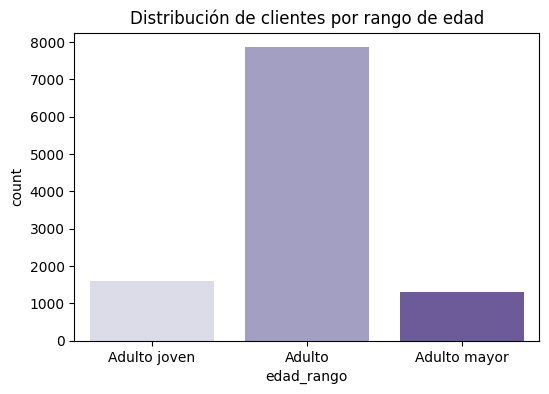

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x="edad_rango", data=df1, palette="Purples")
plt.title("Distribución de clientes por rango de edad")
plt.show()

La mayoría de los clientes pertenecen al grupo Adulto (30-60 años aprox.), lo que confirma que la entidad se enfoca en un segmento en plena etapa laboral y productiva, con mayor acceso y necesidad de crédito. Los grupos de Adulto joven y Adulto mayor son minoritarios, lo que podría representar oportunidades de expansión de productos financieros diseñados específicamente para esos segmentos.

### Variables Categóricas

In [21]:
categoricas=["tipo_credito","tipo_laboral","tendencia_ingresos","Pago_atiempo"]

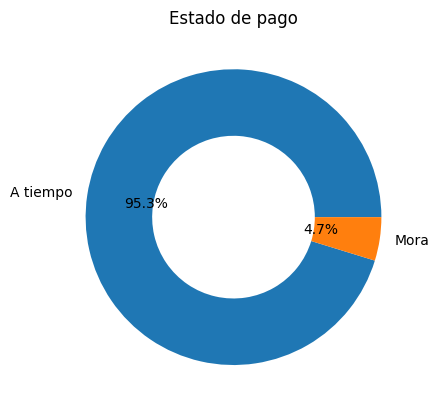

In [22]:
vals = df1["Pago_atiempo"].value_counts(dropna=True).rename({True:"A tiempo", False:"Mora"})
plt.figure(figsize=(4.5,4.5))
plt.pie(vals, labels=vals.index, autopct="%.1f%%", wedgeprops=dict(width=0.45))
plt.title("Estado de pago"); plt.tight_layout(); plt.show()

La mayoría de los clientes paga a tiempo sus créditos

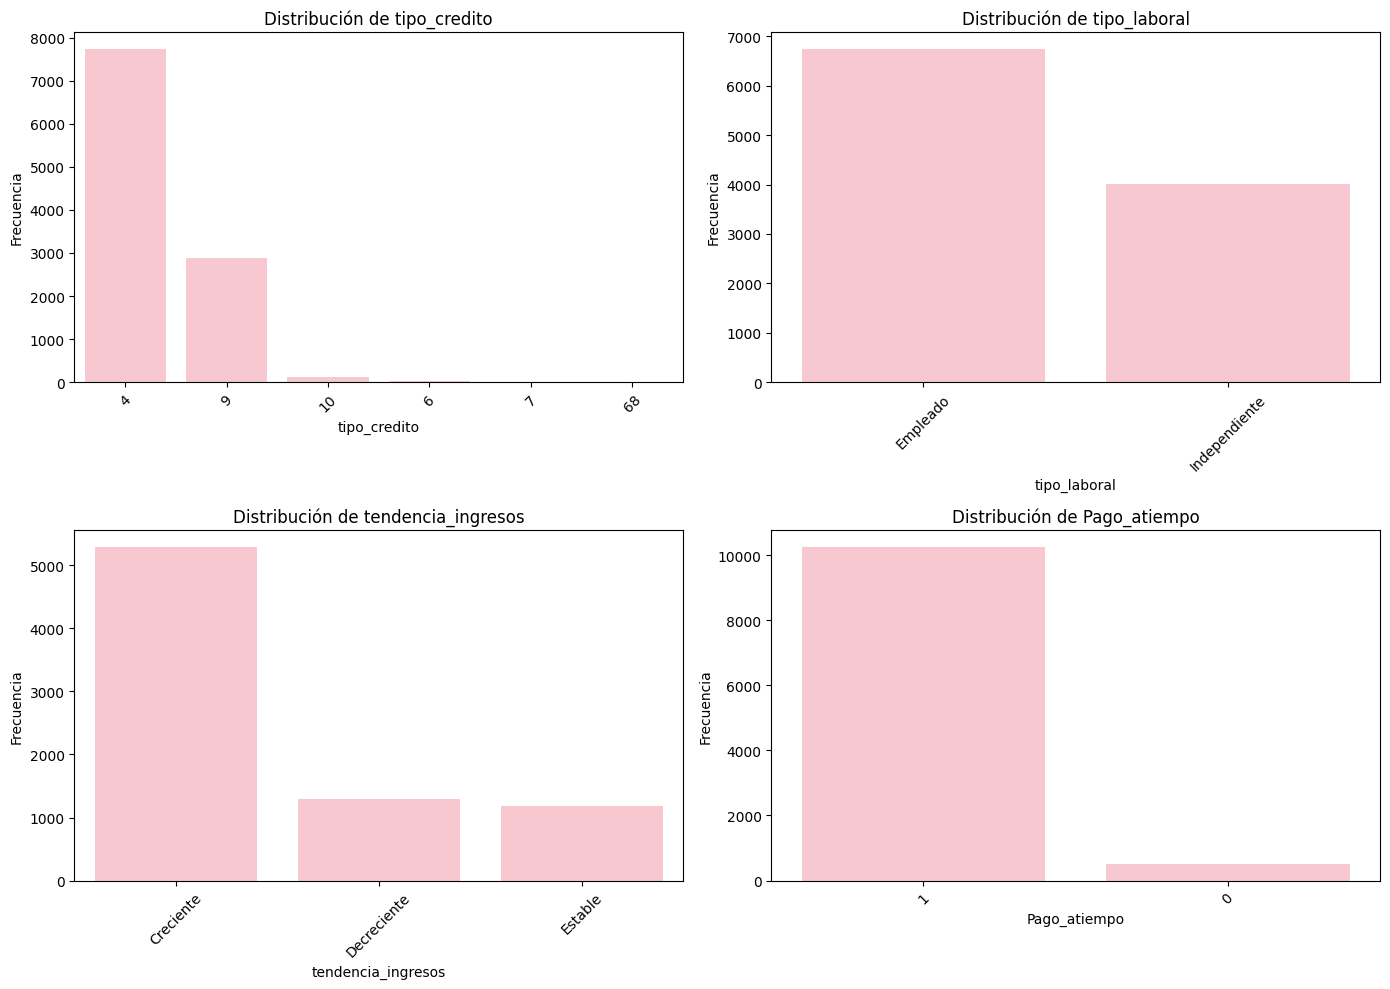

In [23]:
n_cols = 2
n_rows = (len(categoricas) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(categoricas):
    sns.countplot(
        x=col,
        data=df,
        order=df[col].value_counts().index,
        color='pink',
        ax=axes[i]
    )
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Insights

* **Tipo de crédito:** la mayoría de créditos se concentran en las categorías 4 y 9, el resto de tipo de créditos suele ser poco solicitado por la mayoría de los clientes al ser productos muy específicos.
* **Tipo laboral:** La entidad financiera parece otorgar más créditos a personas con relación laboral formal (empleados). Esto tiene sentido porque un empleo formal generalmente se asocia con ingresos más estables, lo que reduce el riesgo percibido. Nota: podría comparar su comportamiento frente al pago para  aportar hallazgos clave a estrategias de riesgo y diseño de productos financieros.
* **Tendencia ingresos:** La mayoría de los clientes tiene ingresos en crecimiento, lo que seguramente facilita que se les aprueben créditos porque muestran mayor capacidad de pago. En cambio, quienes tienen ingresos estables o decrecientes son menos, posiblemente porque el banco es más cuidadoso con ellos al considerarlos de mayor riesgo.
* **Pago a tiempo:** Aunque casi todos los clientes pagan puntualmente, el grupo que no lo hace, aunque pequeño, es muy importante porque representa directamente el riesgo. Nota: está desbalanceada, puede afectar para las predicciones


## Análisis bivariable

#### Variables categóricas respecto a la variable objetivo

**Crosstab**

In [24]:
categoricas = ["tipo_credito","tipo_laboral","tendencia_ingresos"]

for col in categoricas:
    print(f"\n---- {col} vs Pago_atiempo ----")

    tabla = pd.crosstab(df[col], df["Pago_atiempo"])

    tabla_pct = (tabla.div(tabla.sum(axis=1), axis=0) * 100).round(2)

    print("\nFrecuencias absolutas:")
    print(tabla)
    print("\nPorcentajes por fila (%):")
    print(tabla_pct)


---- tipo_credito vs Pago_atiempo ----

Frecuencias absolutas:
Pago_atiempo    0     1
tipo_credito           
4             363  7384
6               9    12
7               0     2
9             136  2740
10              3   113
68              0     1

Porcentajes por fila (%):
Pago_atiempo      0       1
tipo_credito               
4              4.69   95.31
6             42.86   57.14
7              0.00  100.00
9              4.73   95.27
10             2.59   97.41
68             0.00  100.00

---- tipo_laboral vs Pago_atiempo ----

Frecuencias absolutas:
Pago_atiempo     0     1
tipo_laboral            
Empleado       290  6464
Independiente  221  3788

Porcentajes por fila (%):
Pago_atiempo      0      1
tipo_laboral              
Empleado       4.29  95.71
Independiente  5.51  94.49

---- tendencia_ingresos vs Pago_atiempo ----

Frecuencias absolutas:
Pago_atiempo          0     1
tendencia_ingresos           
Creciente           207  5087
Decreciente          81  1210
Esta

* Los créditos tipo 6, aunque poco frecuentes, concentran un nivel de mora significativamente mayor frente al resto, lo cual podría señalar un producto de mayor riesgo. Nota: Podría comparar el tipo de credito con el plazo de meses para ir asociando los tipos de créditos según sus características.
* Los clientes independientes tienen una mora ligeramente mayor  frente a los empleados, lo que puede relacionarse con la inestabilidad de ingresos.
* Los clientes con ingresos decrecientes muestran una mora de 6.3%, más alta que el resto. Infiriendo que a medida que los ingresos decrecen, aumenta la probabilidad de incumplimiento.

#### Variables numéricas respecto a la variable objetivo

Como en esta fase del proyecto todavía no se ha normalzado ninguna variable, se siguen presentando los sesgos para todas las features que estén relacionadas con dinero, es por esto, que para efectos únicamente de visualiación, agruparé por rangos aquellas columnas cuyos valores estén relacionados con números muy altos.

In [25]:
print(numericas)

Index(['capital_prestado', 'plazo_meses', 'edad_cliente', 'salario_cliente',
       'total_otros_prestamos', 'cuota_pactada', 'puntaje',
       'puntaje_datacredito', 'cant_creditosvigentes', 'huella_consulta',
       'saldo_mora', 'saldo_total', 'saldo_principal', 'saldo_mora_codeudor',
       'creditos_sectorFinanciero', 'creditos_sectorCooperativo',
       'creditos_sectorReal', 'promedio_ingresos_datacredito'],
      dtype='object')


In [26]:
# Helper para crear rangos
def make_bins(df1, col, bins, labels, new_col):
    df1[new_col] = pd.cut(df1[col], bins=bins, labels=labels, include_lowest=True)
    return df1

# 1) Salario e ingresos
bins_sal = [0, 1_000_000, 2_000_000, 4_000_000, 8_000_000, np.inf]
lab_sal  = ["0–1M", "1–2M", "2–4M", "4–8M", ">8M"]
df1 = make_bins(df1, "salario_cliente", bins_sal, lab_sal, "salario_rango")
df1 = make_bins(df1, "promedio_ingresos_datacredito", bins_sal, lab_sal, "ingresos_rango")

# 2) Capital prestado
bins_cap = [0, 2_000_000, 5_000_000, 10_000_000, 20_000_000, np.inf]
lab_cap  = ["0–2M", "2–5M", "5–10M", "10–20M", ">20M"]
df1 = make_bins(df1, "capital_prestado", bins_cap, lab_cap, "capital_prestado_rango")

# 3) Cuota pactada (normalmente menor que capital)
bins_cuota = [0, 200_000, 500_000, 1_000_000, 2_000_000, np.inf]
lab_cuota  = ["0–200k", "200–500k", "500k–1M", "1–2M", ">2M"]
df1 = make_bins(df1, "cuota_pactada", bins_cuota, lab_cuota, "cuota_pactada_rango")

# 4) Saldos
bins_saldo = [0, 10_000, 20_000, 50_000, 100_000, np.inf]
lab_saldo  = ["0–10k", "10k–20k", "20k–50k", "50k–100k", ">1M"]
for col in ["saldo_mora","saldo_total","saldo_principal","saldo_mora_codeudor"]:
    df1 = make_bins(df1, col, bins_saldo, lab_saldo, f"{col}_rango")

# 5) Otros préstamos
bins_otros = [0, 500_000, 2_000_000, 5_000_000, 10_000_000, np.inf]
lab_otros  = ["0–500k", "0.5–2M", "2–5M", "5–10M", ">10M"]
df1 = make_bins(df1, "total_otros_prestamos", bins_otros, lab_otros, "otros_prestamos_rango")

In [27]:
rangos_cols = ["salario_rango","ingresos_rango","capital_prestado_rango","cuota_pactada_rango", "saldo_mora_rango","saldo_total_rango","saldo_principal_rango", "saldo_mora_codeudor_rango","otros_prestamos_rango"]

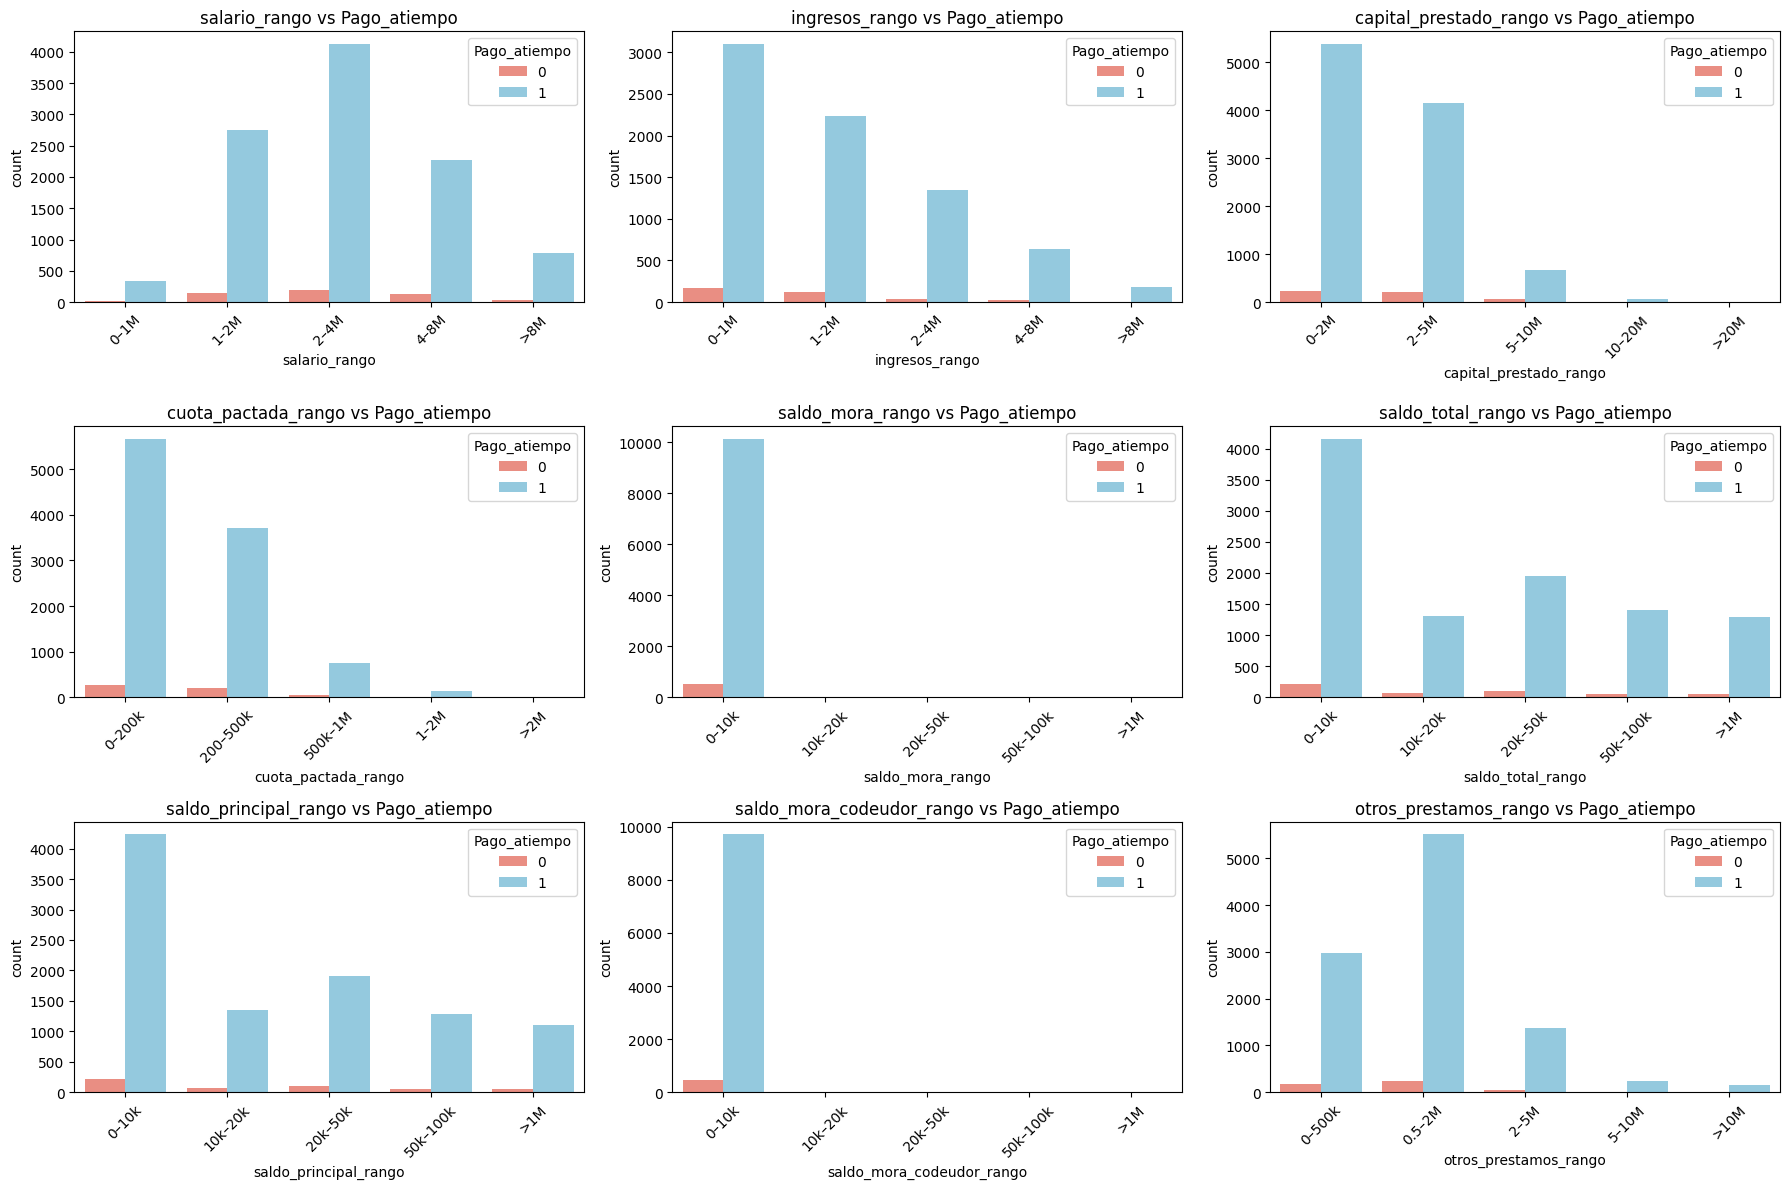

In [28]:
vars_a = [c for c in rangos_cols if c in df1.columns]
cols = 3
rows = math.ceil(len(vars_a)/cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, 4*rows))
axes = axes.flatten()

for i, col in enumerate(vars_a):
    sns.countplot(x=col, hue="Pago_atiempo", data=df1, ax=axes[i], palette=["salmon","skyblue"])
    axes[i].set_title(f"{col} vs Pago_atiempo")
    axes[i].tick_params(axis="x", rotation=45)

# quitar ejes vacíos
for ax in axes[len(vars_a):]:
    ax.remove()

plt.tight_layout()
plt.show()

* Salario e ingresos: los clientes con menores ingresos son quienes más incumplen a la hora de pagar. A medida que el salario y los ingresos aumentan, la probabilidad de incumplimiento disminuye notablemente.

* Capital prestado: la mayoría de los créditos se concentran en montos pequeños (0–5M). El incumplimiento aparece principalmente en estos rangos bajos, mientras que los créditos de mayor valor prácticamente no lo presentan.

* Cuota pactada: los clientes con cuotas más bajas son los que más incumplen. A medida que la cuota aumenta, el incumplimiento disminuye, lo que sugiere que quienes asumen cuotas más altas tienen mayor estabilidad financiera.

* Saldo total y saldo principal: aunque la cartera se concentra en montos de hasta 20M, el incumplimiento no crece proporcionalmente con el saldo. Los créditos grandes muestran buen comportamiento de pago.

* Saldo en mora y saldo en mora del codeudor: la gran mayoría de clientes no presentan atrasos, y los pocos que sí lo hacen representan un grupo reducido pero crítico. En el caso de codeudores, casi todos están en cero, aunque los pocos con incumplimiento son una señal de alerta.

* Otros préstamos: los clientes con montos bajos en otros préstamos presentan más incumplimiento que aquellos con montos altos. Esto puede estar relacionado con sobreendeudamiento en segmentos de menor capacidad económica.

C:\Users\Clarita\AppData\Local\Temp\ipykernel_14016\891522314.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Clarita\AppData\Local\Temp\ipykernel_14016\891522314.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Clarita\AppData\Local\Temp\ipykernel_14016\891522314.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Clarita\AppData\Local\Temp\ipykernel_14016\891522314.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

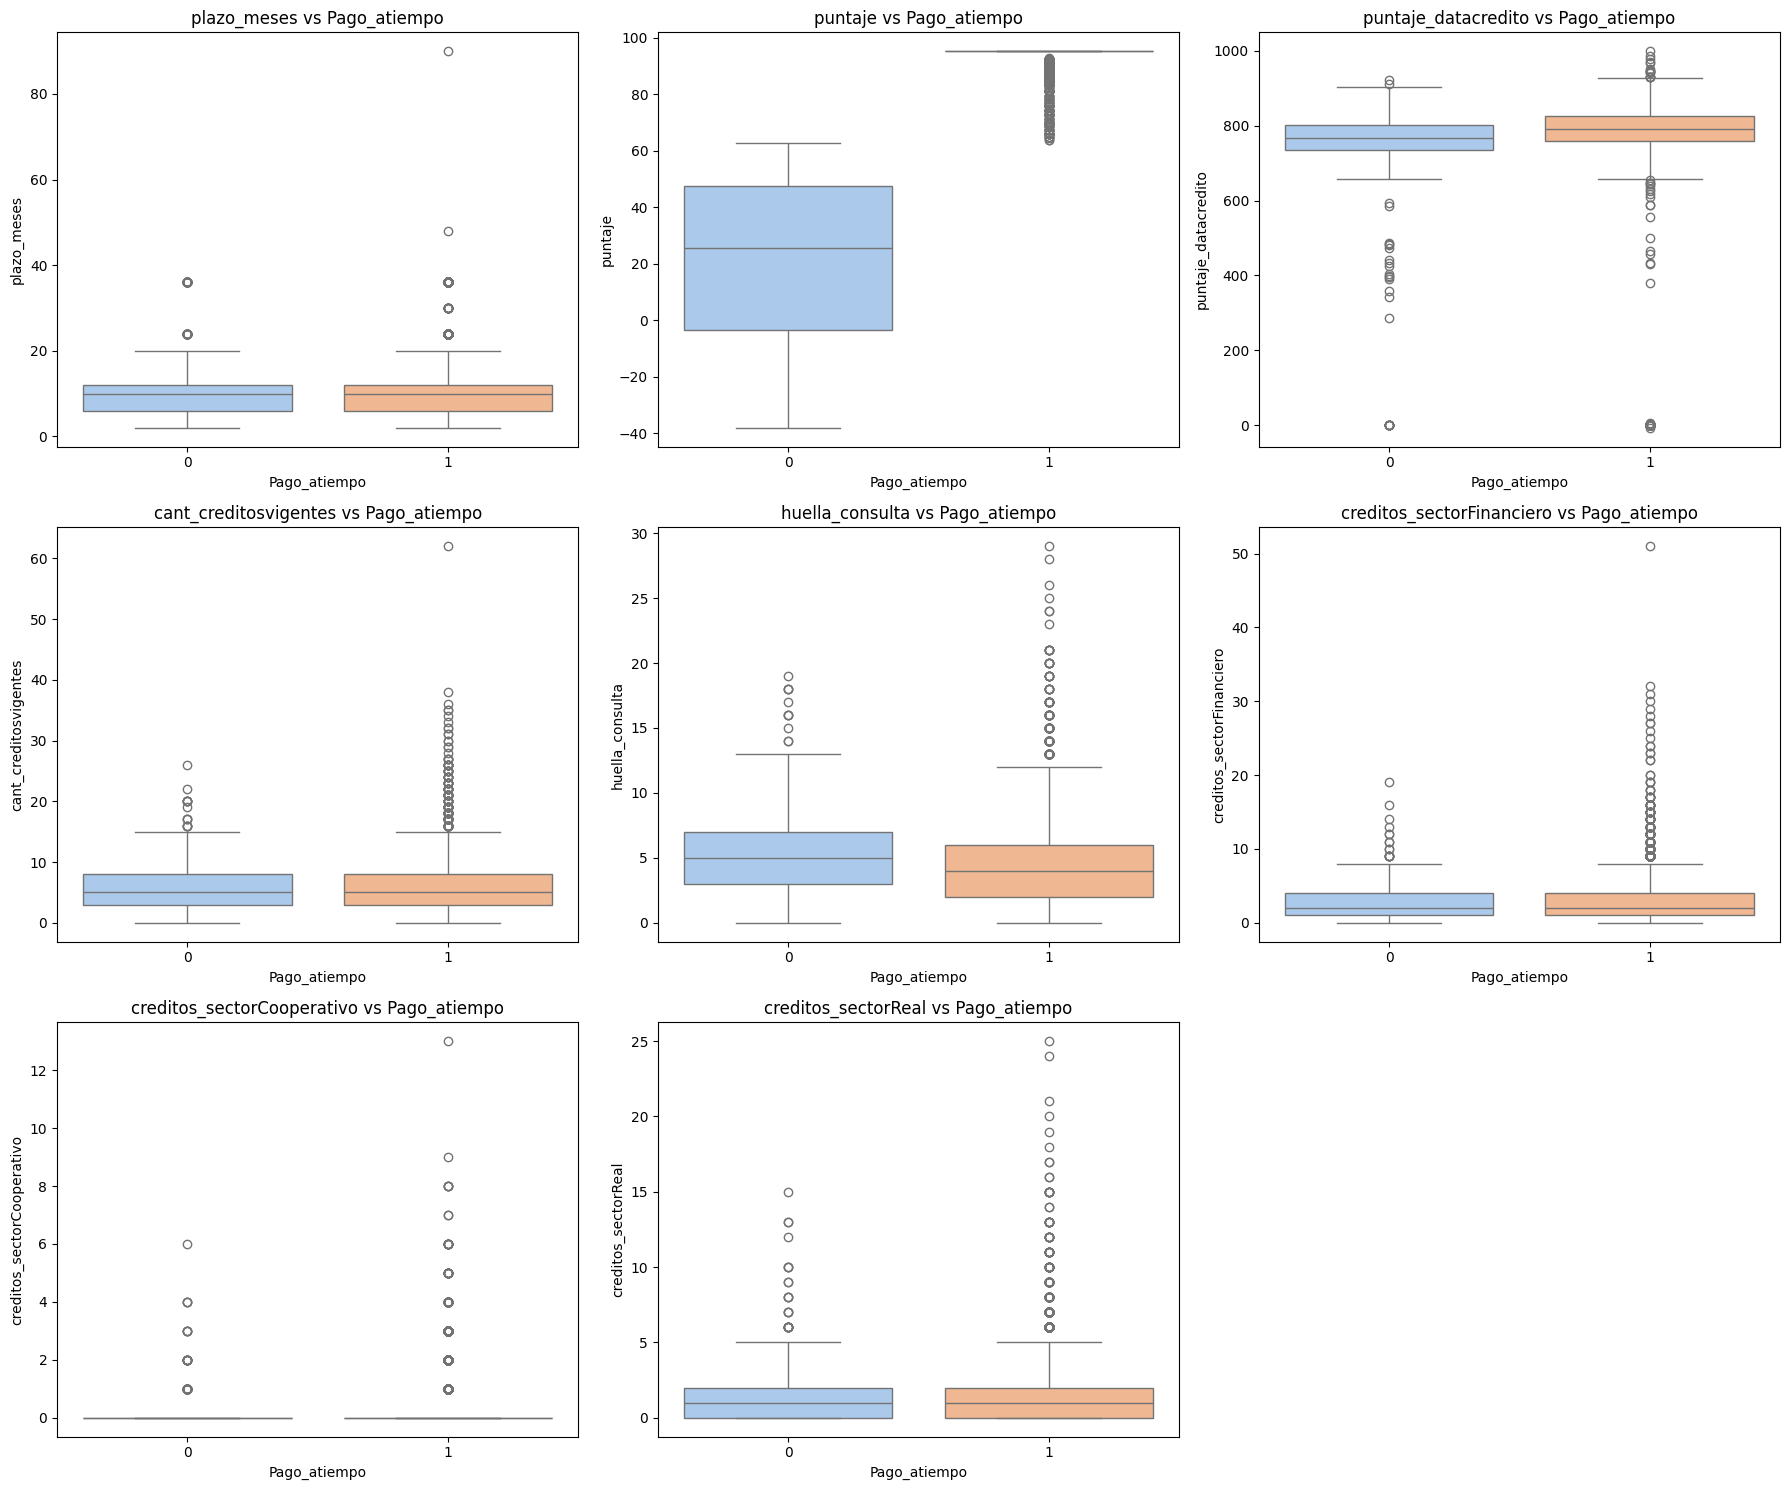

In [29]:
# Variables numéricas sin rangos
num= ['plazo_meses', 'puntaje', 'puntaje_datacredito', 'cant_creditosvigentes', 'huella_consulta','creditos_sectorFinanciero', 'creditos_sectorCooperativo','creditos_sectorReal']

# Boxplots en varias gráficas horizontales
n_cols = 3
n_rows = (len(num) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(num):
    sns.boxplot(
        data=df,
        x="Pago_atiempo",
        y=col,
        palette="pastel",
        ax=axes[i]
    )
    axes[i].set_title(f"{col} vs Pago_atiempo")
    axes[i].set_xlabel("Pago_atiempo")
    axes[i].set_ylabel(col)

# Eliminar ejes vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

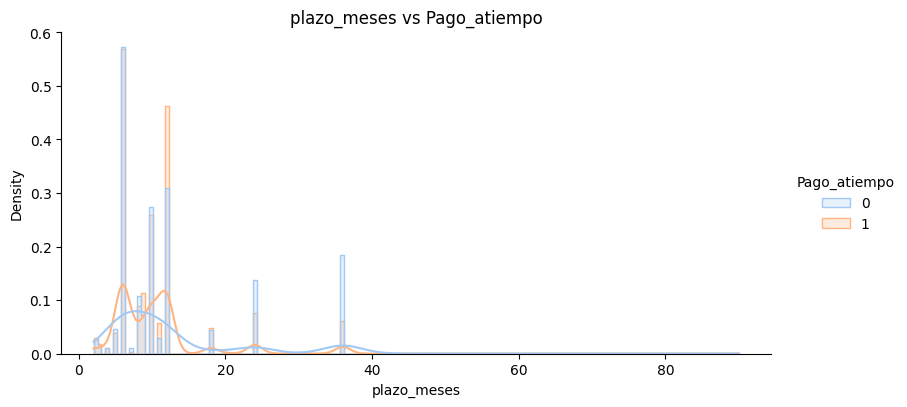

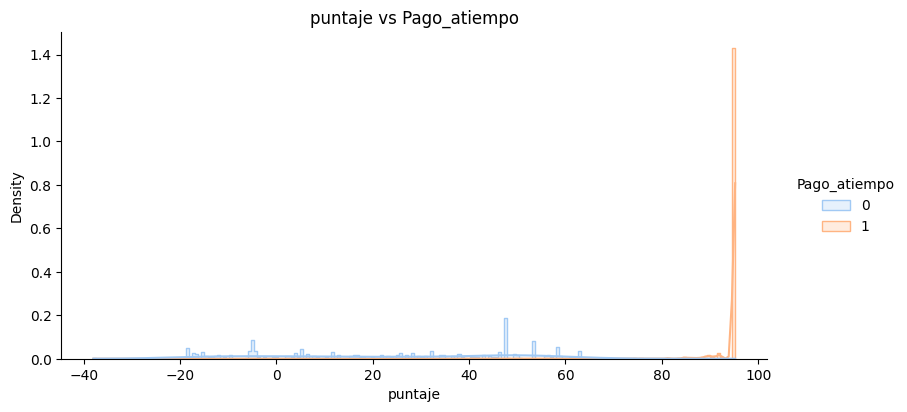

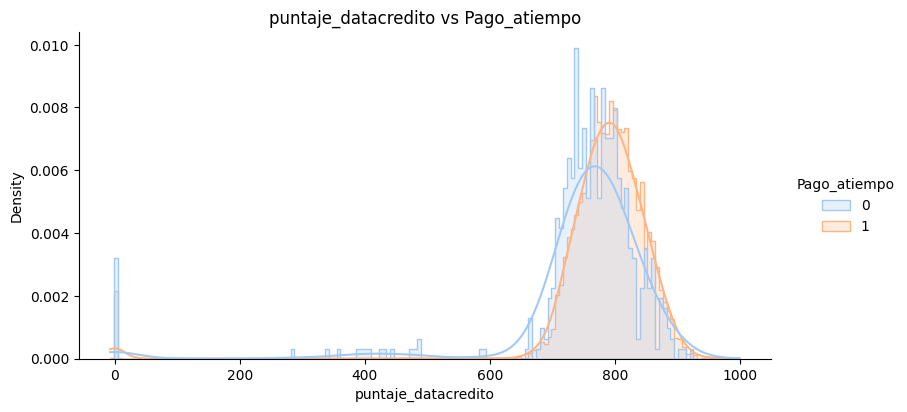

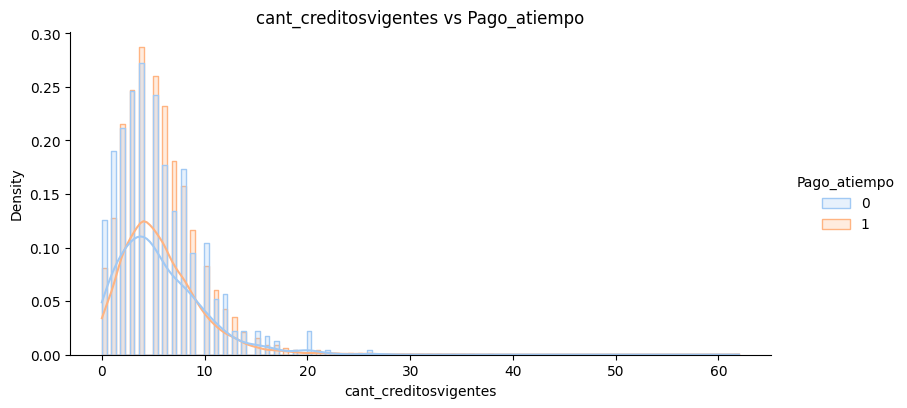

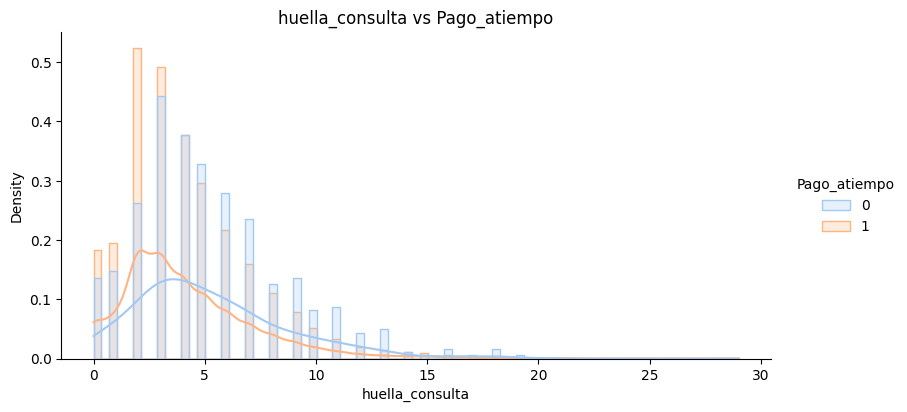

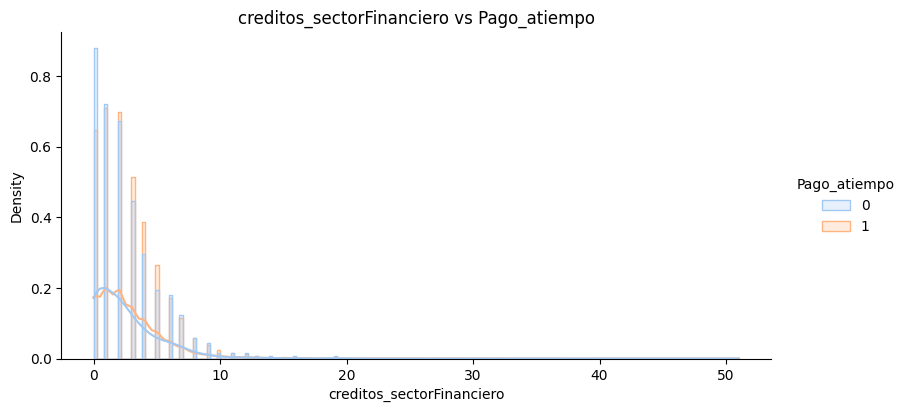

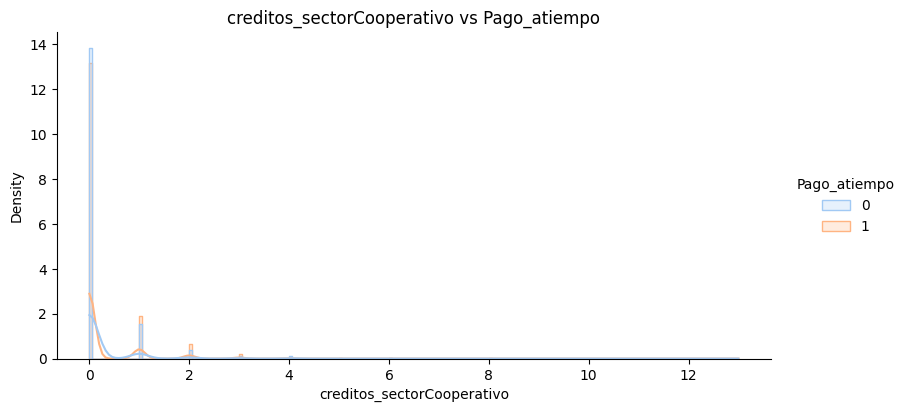

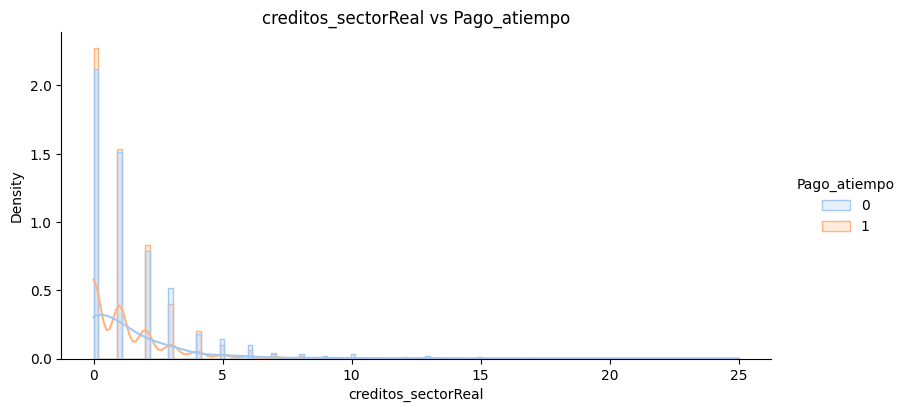

In [30]:
for col in num:
    sns.displot(data=df, x=col, hue="Pago_atiempo", kind="hist",
                kde=True, element="step", stat="density",
                common_norm=False, palette="pastel", height=4, aspect=2)
    plt.title(f"{col} vs Pago_atiempo")
    plt.show()

* **Plazo_meses vs Pago_atiempo:** los créditos más largos tienden a presentar más incumplimientos. Esto quiere decir que mientras más extenso sea el tiempo de pago, mayor es la probabilidad de caer en mora
* **Huella consulta vs pago a tiempo:** Cuando un cliente tiene muchas consultas de crédito recientes, la probabilidad de incumplimiento es más alta. Esto puede interpretarse como que esas personas están buscando financiamiento de manera constante, lo que las hace más vulnerables a caer en mora.
* **Créditos vigentes vs pago a tiempo:** Los clientes que tienen varios créditos activos presentan más variabilidad en su comportamiento y, en muchos casos, caen en mora. Esto muestra que un endeudamiento simultáneo elevado incrementa el riesgo de incumplimiento.

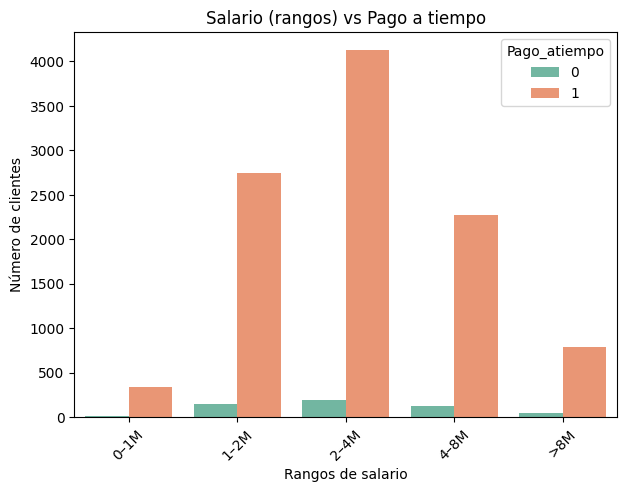

In [31]:
plt.figure(figsize=(7,5))
sns.countplot(x="salario_rango", hue="Pago_atiempo", data=df1, palette="Set2")
plt.title("Salario (rangos) vs Pago a tiempo")
plt.xlabel("Rangos de salario")
plt.ylabel("Número de clientes")
plt.xticks(rotation=45)
plt.show()

**¿Existen diferencias en los plazos solicitados entre clientes jóvenes y adultos mayores?**

In [32]:
bins = [0, 12, 36, df1["plazo_meses"].max()]
labels = ["Corto plazo", "Mediano plazo", "Largo plazo"]

# Crear nueva columna
df1["plazo_rango"] = pd.cut(df1["plazo_meses"], bins=bins, labels=labels, right=True)

bins = [18, 30, 60, df1["plazo_meses"].max()]
labels = ["Adulto Joven", "Adulto", "Adulto Mayor"]

# Crear nueva columna
df1["edad_rango"] = pd.cut(df1["edad_cliente"], bins=bins, labels=labels, right=True)

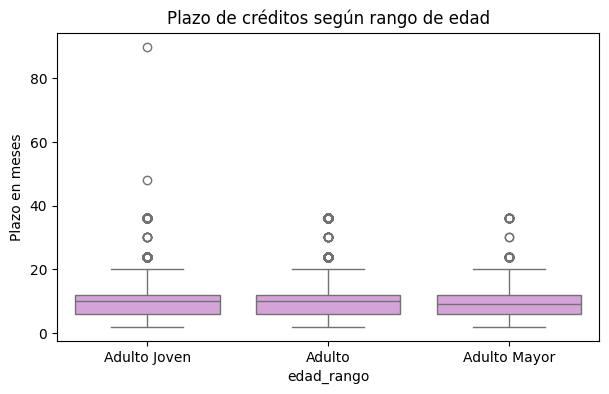

In [33]:
plt.figure(figsize=(7,4))
sns.boxplot(x="edad_rango", y="plazo_meses", data=df1, color='#db9ae1')
plt.title("Plazo de créditos según rango de edad")
plt.ylabel("Plazo en meses")
plt.show()

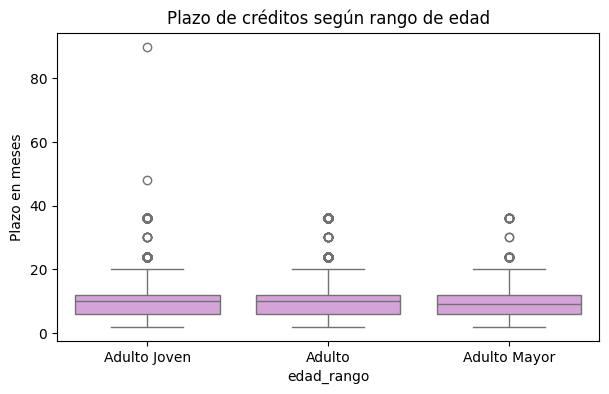

In [34]:
plt.figure(figsize=(7,4))
sns.boxplot(x="edad_rango", y="plazo_meses", data=df1, color='#db9ae1')
plt.title("Plazo de créditos según rango de edad")
plt.ylabel("Plazo en meses")
plt.show()

En su mayoría todos los créditos están en plazos cortos sin importar la edad, lo que sugiere una estrategia de bajo riesgo y rápida rotación del capital. Sin embargo, se observan algunos casos en adultos jóvenes y adultos con plazos largos, lo que puede indicar productos especiales o necesidades puntuales de financiamiento.

##  Análisis Multivariable

**Matriz de correlación**

In [35]:
df[numericas].corr()

,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito
capital_prestado,1.000000,0.299781,0.125006,0.047038,0.065190,0.764104,-0.043213,-0.151203,0.050692,0.027028,0.028085,0.136749,0.176448,-0.005356,0.109092,-0.016758,-0.077828,0.118312
plazo_meses,0.299781,1.000000,-0.085572,-0.012839,-0.013317,-0.227221,-0.074331,0.002263,-0.002911,0.045767,0.019881,-0.033677,-0.048684,-0.001230,-0.002217,0.032823,-0.004901,0.022701
edad_cliente,0.125006,-0.085572,1.000000,0.147414,0.199710,0.154653,0.033215,-0.380759,-0.038541,-0.238611,0.027409,0.054580,0.083165,0.018900,0.014899,-0.000368,-0.048441,0.029731
salario_cliente,0.047038,-0.012839,0.147414,1.000000,0.596990,0.052353,-0.003740,-0.190664,-0.040600,-0.041305,0.003955,0.004780,0.007171,-0.000119,-0.024268,-0.013259,-0.026476,-0.004411
total_otros_prestamos,0.065190,-0.013317,0.199710,0.596990,1.000000,0.059430,-0.006892,-0.283266,-0.050249,-0.051766,0.005808,0.082754,0.110207,-0.001218,-0.031949,-0.014444,-0.027815,0.024089
cuota_pactada,0.764104,-0.227221,0.154653,0.052353,0.059430,1.000000,-0.005896,-0.132308,0.053578,0.003220,0.004707,0.148522,0.200587,-0.006075,0.113093,-0.030780,-0.074152,0.092156
puntaje,-0.043213,-0.074331,0.033215,-0.003740,-0.006892,-0.005896,1.000000,0.090551,0.014367,-0.082767,-0.098250,0.012456,0.009630,0.002905,0.028754,0.028542,-0.024924,0.046484
puntaje_datacredito,-0.151203,0.002263,-0.380759,-0.190664,-0.283266,-0.132308,0.090551,1.000000,0.105010,0.017779,-0.192569,0.073569,0.082822,0.001459,0.145453,0.033414,-0.053821,0.122352
cant_creditosvigentes,0.050692,-0.002911,-0.038541,-0.040600,-0.050249,0.053578,0.014367,0.105010,1.000000,0.317554,0.009221,0.402105,0.485953,-0.012677,0.791253,0.197594,0.540677,0.160992
huella_consulta,0.027028,0.045767,-0.238611,-0.041305,-0.051766,0.003220,-0.082767,0.017779,0.317554,1.000000,-0.014460,0.139947,0.171006,-0.016528,0.253936,0.024809,0.174850,0.024367


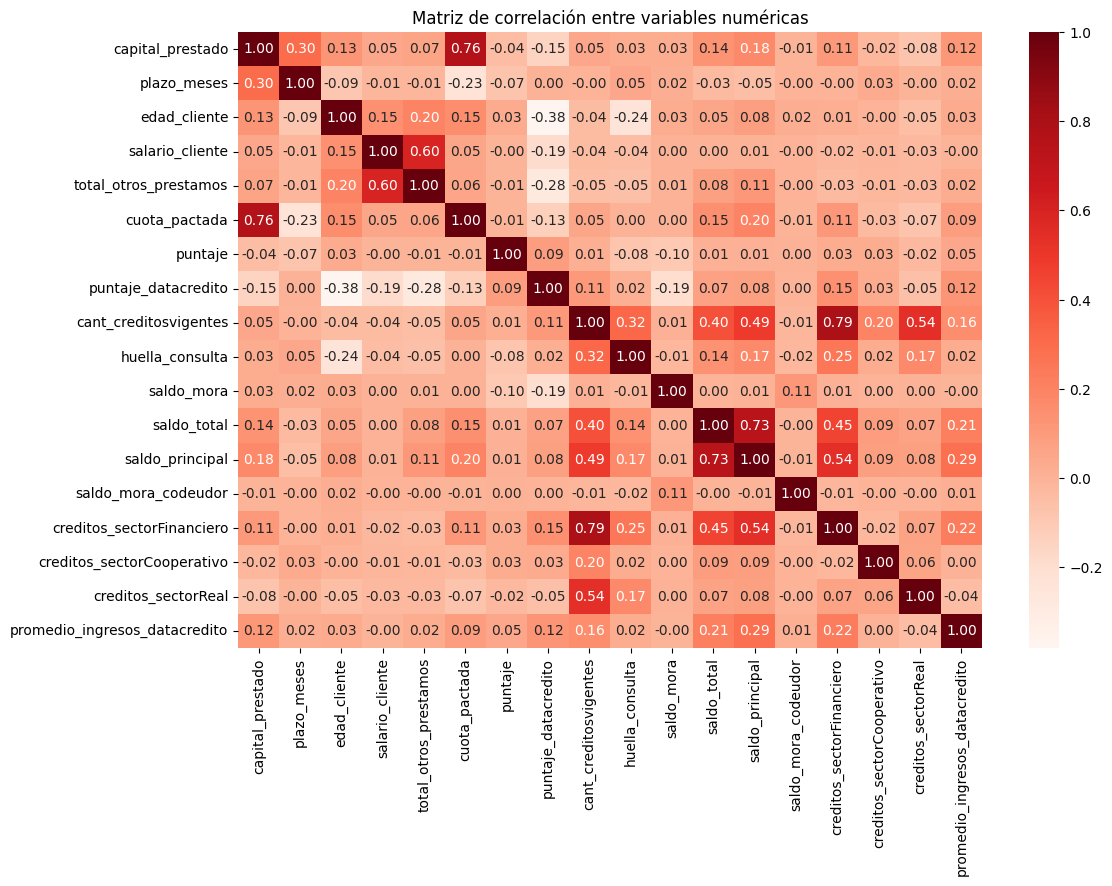

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1[numericas].corr(), annot=True, cmap='Reds', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

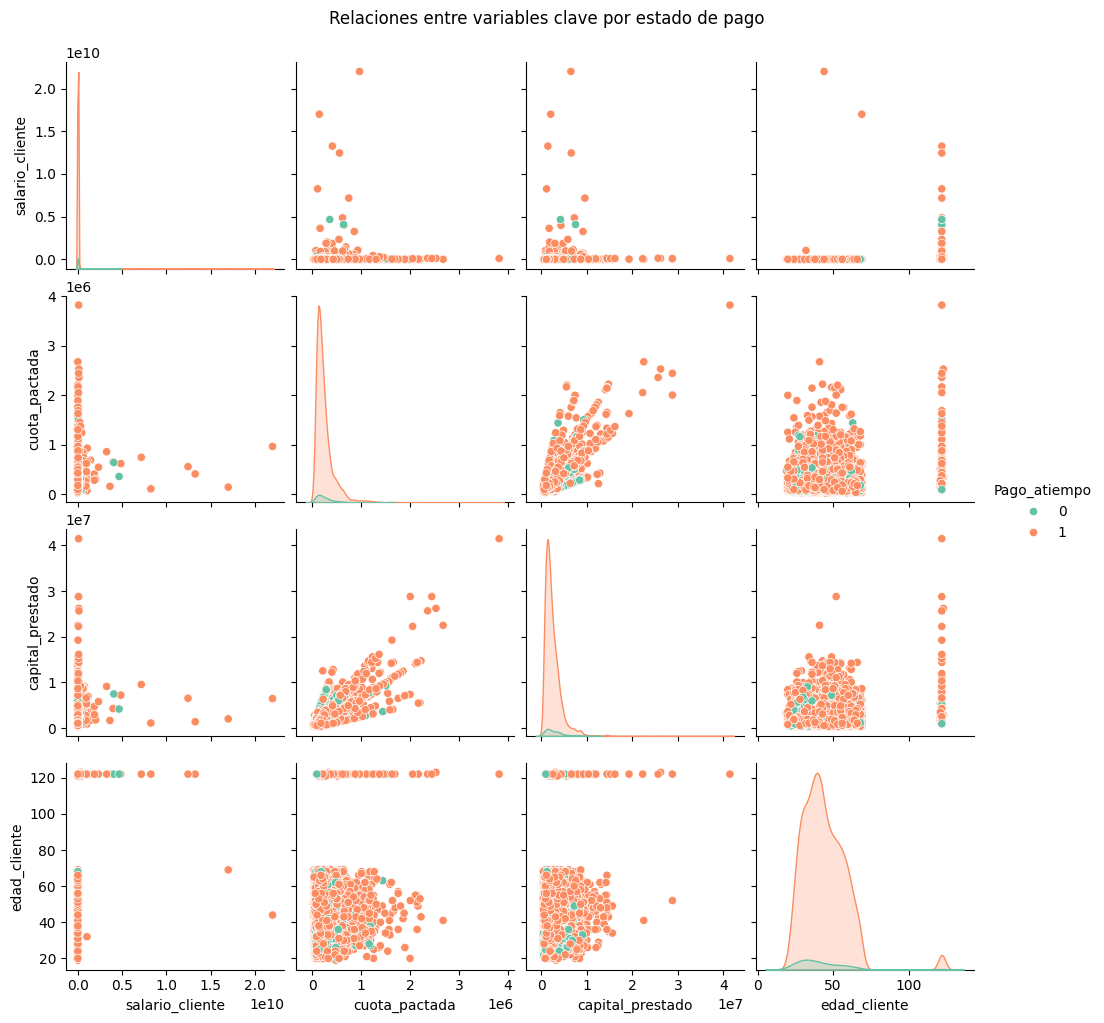

In [37]:
sns.pairplot(df1, vars=["salario_cliente", "cuota_pactada", "capital_prestado", "edad_cliente"],
             hue="Pago_atiempo", palette="Set2", diag_kind="kde")
plt.suptitle("Relaciones entre variables clave por estado de pago", y=1.02)
plt.show()

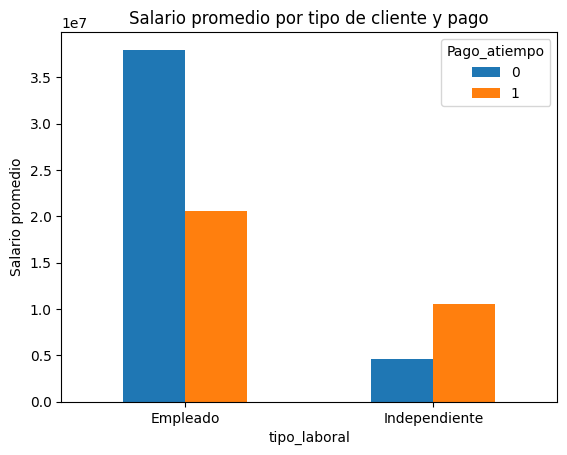

In [38]:
df1.groupby(["tipo_laboral", "Pago_atiempo"])["salario_cliente"].mean().unstack().plot(kind='bar')
plt.title("Salario promedio por tipo de cliente y pago")
plt.ylabel("Salario promedio")
plt.xticks(rotation=0)
plt.show()

### Análisis de promedio_ingresos_datacredito y salario_cliente

Se sabe que **salario cliente** es una variable digitada por el cliente, entonces puede estar sesgada en información respecto al salario real de los clientes; mientras que **promedio ingresos datacredito** es una variable calculada que refleja la realidad de los ingresos de los clientes. Es por esto que se quiere analizar estadísticamente la relación entre estas dos variables, y así saber si lo que declaran los clientes es realmente lo que ganan

In [39]:
# Calcular factor
df["factor_individual"] = df["promedio_ingresos_datacredito"] / df["salario_cliente"]

# Reemplazar valores inf con NaN
df.loc[~np.isfinite(df["factor_individual"]), "factor_individual"] = np.nan

df.groupby("tipo_laboral")["factor_individual"].describe()

C:\Users\Clarita\AppData\Local\Temp\ipykernel_14016\1894589985.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tipo_laboral")["factor_individual"].describe()


,count,mean,std,min,25%,50%,75%,max
tipo_laboral,,,,,,,,
Empleado,5461.0,0.754199,0.526576,0.0,0.435021,0.726757,0.989295,19.053290
Independiente,2356.0,0.350219,0.351069,0.0,0.155549,0.250282,0.424621,4.729287


In [40]:
df = df.drop(columns=["factor_individual"])

Al analizar estas medidas estadísticas, se evidencia que el ingreso real para los empleados corresponde al 73% del declarado, mientras que en los independientes es cercano al 25%. Estos factores se pueden utilizar más adelante para coeficientes de ajuste en la imputación de nulos en caso de querer conservar **promedio ingresos datacredito**

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   tipo_credito                   10763 non-null  category
 1   capital_prestado               10763 non-null  float64 
 2   plazo_meses                    10763 non-null  int64   
 3   edad_cliente                   10763 non-null  int64   
 4   tipo_laboral                   10763 non-null  category
 5   salario_cliente                10763 non-null  int64   
 6   total_otros_prestamos          10763 non-null  int64   
 7   cuota_pactada                  10763 non-null  int64   
 8   puntaje                        10763 non-null  float64 
 9   puntaje_datacredito            10757 non-null  float64 
 10  cant_creditosvigentes          10763 non-null  int64   
 11  huella_consulta                10763 non-null  int64   
 12  saldo_mora                     1

In [ ]:
df.to_csv(r"C:\Users\Clarita\repo_modelado_ClaraOtalvaro\mlops_pipeline\data\df_post_eda.csv", index=False)
